In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# PART A

CONTEXT: The  data  concerns  city-cycle  fuel  consumption  in  miles  per  gallon  to  be  predicted  in  terms  of  3  multivalued  discrete  and  5 continuous attributes.

OBJECTIVE: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

1. DATA UNDERSTANDING AND EXPLORATION - 

In [2]:
#A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.
cname = pd.read_csv("Part1+-+Car+name.csv")
cname.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [3]:
#B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable
cattr = pd.read_json("Part1+-+Car-Attributes.json")
cattr.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
#C. Merge both the DataFrames together to form a single DataFrame
car_data = pd.concat([cname,cattr],axis=1)
car_data.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
car_data_c = car_data.copy(deep=True)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
#D. Print 5 point summary of the numerical features and share insights.
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


2. DATA PREPARATION AND ANALYSIS

In [7]:
#A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach
car_data.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [8]:
car_data['hp'] = pd.to_numeric(car_data['hp'],errors='coerce')
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        392 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [9]:
(car_data.isna().sum() / car_data.shape[0]) * 100

car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          1.507538
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64

In [10]:
car_data['hp'] = car_data['hp'].replace(' ',np.nan)
med = car_data['hp'].median()
car_data['hp'] = car_data['hp'].fillna(med)
car_data.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [11]:
#B. Check for duplicate values in the data and impute with the best suitable approach.
car_data.duplicated().sum()

0

There seems to be no duplicate values in the given dataset. So we can proceed with the next step.

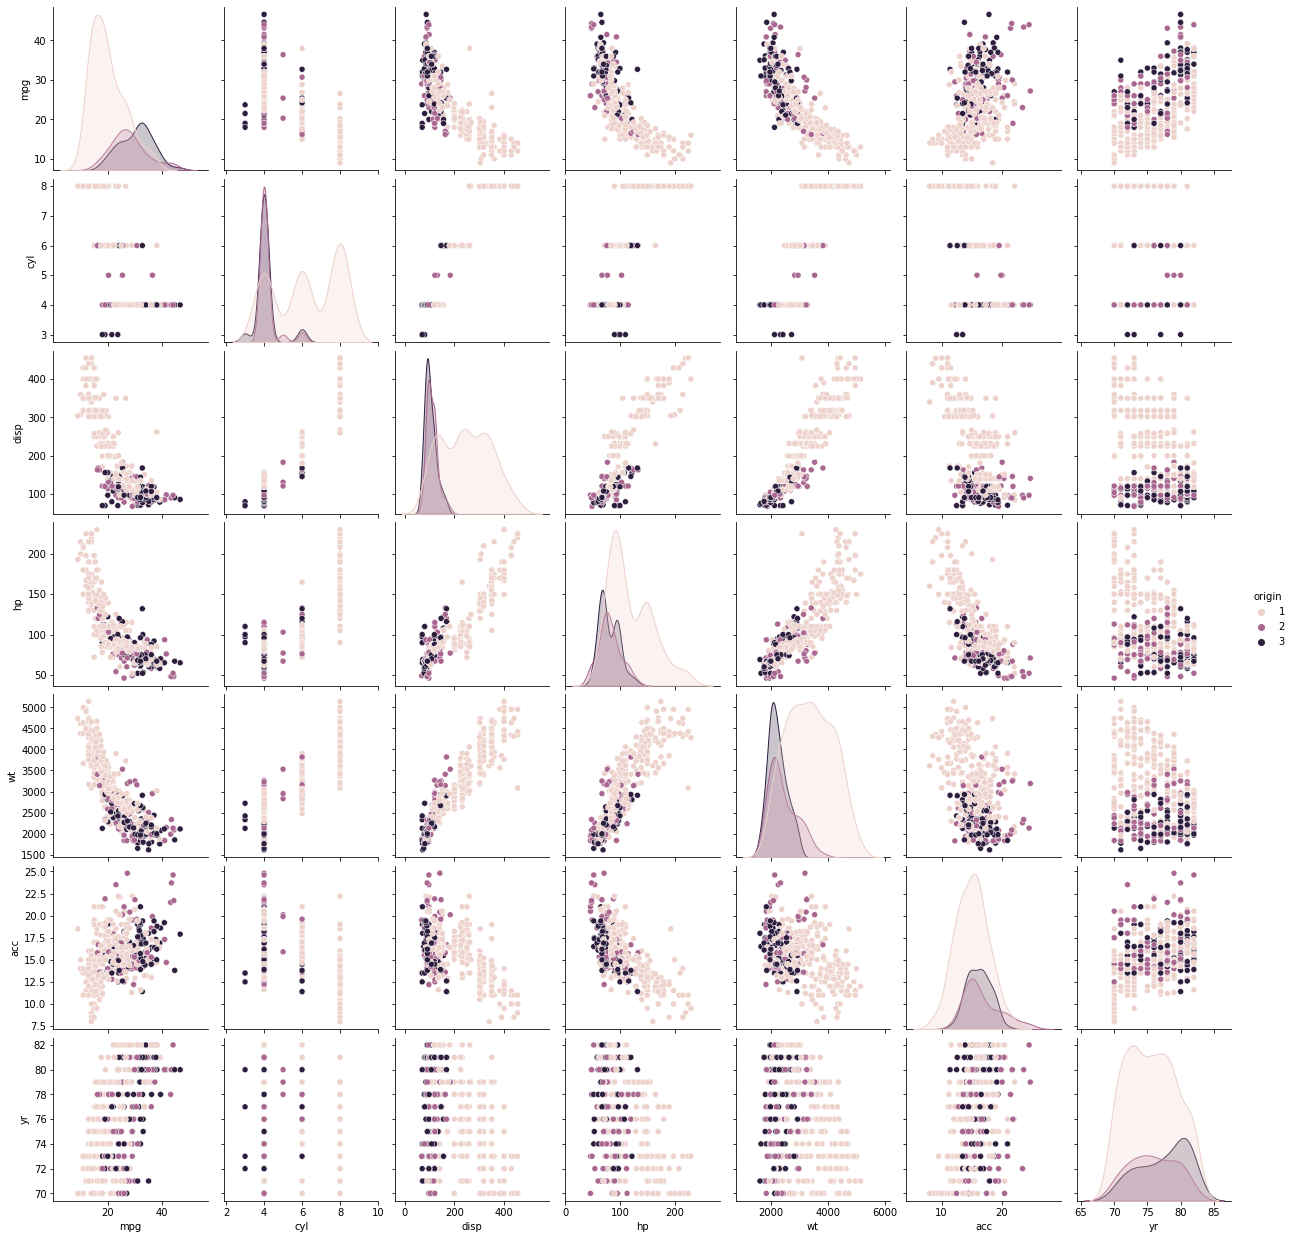

In [12]:
#C. Plot a pairplot for all features.
sns.pairplot(data=car_data,diag_kind='kde',hue='origin')

<AxesSubplot: xlabel='wt', ylabel='disp'>

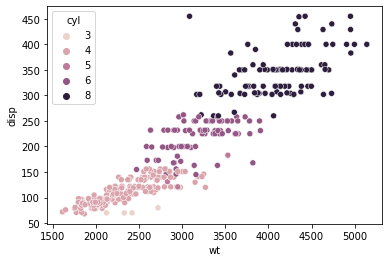

In [13]:
#D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. 
sns.scatterplot(data=car_data,x='wt',y='disp',hue='cyl')

<AxesSubplot: xlabel='wt', ylabel='disp'>

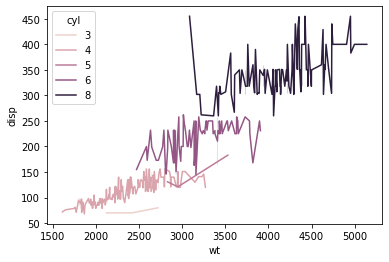

In [14]:
#E. Share insights for Q2.d.
sns.lineplot(data=car_data,x='wt',y='disp',hue='cyl')

i) The features 'wt' and 'disp' have a positive correlation with other.

ii) The graph concludes that the number of cars with 8 cylinders have got higher range of weights between 3500 to 5000 approximately and range of displacement between 300 to 450, compared to other cars. 

<AxesSubplot: xlabel='wt', ylabel='mpg'>

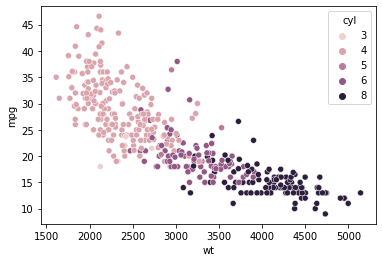

In [15]:
#F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.
sns.scatterplot(data=car_data,x='wt',y='mpg',hue='cyl')

<AxesSubplot: xlabel='wt', ylabel='mpg'>

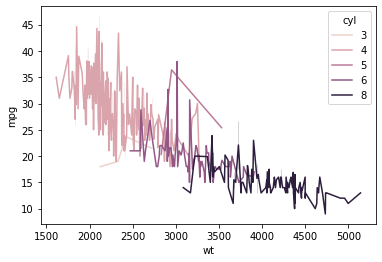

In [16]:
#G. Share insights for Q2.f.
sns.lineplot(data=car_data,x='wt',y='mpg',hue='cyl')

i) The features 'wt' and 'mpg' have a negetive correlation with each other

ii) The graph concludes that the cars with 8 cylinders and higher weight has got less miles per gallons compared to other cars.

In [17]:
#H. Check for unexpected values in all the features and datapoints with such values. 
hpIsDigit = pd.DataFrame(car_data_c.hp.str.isdigit())
car_data_c[hpIsDigit['hp'] == False]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [18]:
from warnings import filterwarnings 
filterwarnings("ignore")
car_data_c = car_data_c.replace('?',np.nan)
car_data_c.median()

mpg         23.0
cyl          4.0
disp       148.5
hp          93.5
wt        2803.5
acc         15.5
yr          76.0
origin       1.0
dtype: float64

In [19]:
car_data_c = car_data_c.drop(['car_name'],axis=1)
medianFill = lambda x: x.fillna(x.median())
car_data_c = car_data_c.apply(medianFill,axis=0)
car_data_c['hp'] = car_data_c['hp'].astype('float64')
car_data_c.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [20]:
car_data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


3. CLUSTERING

In [21]:
#A. Apply K-Means clustering for 2 to 10 clusters.
from scipy import stats
from scipy.stats import zscore
car_data_set = car_data_c.drop(columns = ['origin'])
car_data_norm = car_data_set.apply(zscore)
car_data_norm_c = car_data_norm.copy(deep=True)
car_data_norm.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [22]:
from warnings import filterwarnings 
filterwarnings("ignore")
from sklearn.cluster import KMeans
sos = []
for i in range(2,11):
    Kclust = KMeans(n_clusters=i,n_init="auto")
    Kclust.fit(car_data_norm)
    sos.append(Kclust.inertia_)
sos

[1295.1229352629575,
 946.3331203918417,
 738.415973714963,
 671.5425148390602,
 623.3649662838957,
 572.0315658607091,
 517.314245258289,
 522.7730367455109,
 431.15002220156543]

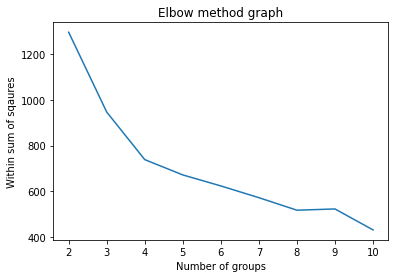

In [23]:
#B. Plot a visual and find elbow point.
plt.plot(range(2,11),sos)
plt.title('Elbow method graph')
plt.xlabel('Number of groups')
plt.ylabel("Within sum of sqaures")
plt.show()

In [24]:
#C. On the above visual, highlight which are the possible Elbow points. 
data = {'Number of clusters':[i for i in range(2,11)],'Inertia value of cluster':[sos[i] for i in range(0,9)]}
cluster_df = pd.DataFrame(data)
cluster_df

,Number of clusters,Inertia value of cluster
0,2,1295.122935
1,3,946.333120
2,4,738.415974
3,5,671.542515
4,6,623.364966
5,7,572.031566
6,8,517.314245
7,9,522.773037
8,10,431.150022


In [25]:
#D. Train a K-means clustering model once again on the optimal number of clusters.
k_model = KMeans(n_clusters = 4)
k_model.fit(car_data_norm)
cl_labels = k_model.predict(car_data_norm)
cl_cent = k_model.cluster_centers_
print("Predicted values are :",cl_labels)
print("Centroids of clusters are:",cl_cent)

Predicted values are : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 2 3 3 3 3 3 3 3 2 0 0 0 0 3 3 3 3 2 2 2 2
 2 0 0 0 0 0 0 0 2 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 3 0 0 0 0 2 3 3 3
 3 3 2 3 0 0 3 3 3 3 0 3 2 0 2 2 2 2 3 3 3 3 2 2 2 0 0 0 0 0 3 3 3 3 3 3 3
 3 3 3 3 2 2 2 2 0 0 0 0 2 2 2 2 2 2 0 3 3 2 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3
 3 3 0 0 0 0 2 2 2 2 3 3 3 1 2 2 2 2 3 1 3 3 3 0 3 2 2 0 0 0 0 1 1 1 3 1 0
 2 0 0 2 2 2 2 0 0 0 0 1 3 3 3 1 1 1 1 2 3 3 1 1 1 1 1 2 0 0 2 2 2 1 2 2 2
 2 2 2 0 2 0 0 1 1 1 1 3 3 3 3 2 2 3 2 1 1 2 2 1 2 2 2 0 0 2 0 0 2 0 1 1 1
 1 2 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1]
Centroids of clusters are: [[-1.16379715  1.49819126  1.50392292  1.52168282  1.40409797 -1.0861486
  -0.68832385]
 [ 1.18017325 -0.82534015 -0.78164519 -0.74051725 -0.7

In [26]:
car_data_norm_c.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [27]:
car_data_set.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [28]:
#E. Add a new feature in the DataFrame which will have labels based upon cluster value
car_data['Clustered'] = cl_labels
car_data.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Clustered
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,0


In [29]:
car_data_norm['Clustered'] = cl_labels
car_data_norm.head()

,mpg,cyl,disp,hp,wt,acc,yr,Clustered
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,0
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,0
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,0
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,0
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,0


In [30]:
car_data['Clustered'].value_counts()

1    114
3     99
0     94
2     91
Name: Clustered, dtype: int64

In [31]:
car_data_norm['Clustered'].value_counts()

1    114
3     99
0     94
2     91
Name: Clustered, dtype: int64

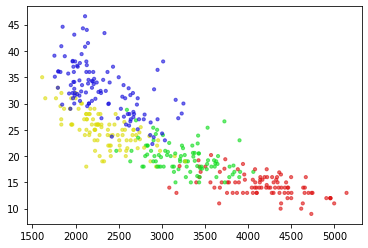

In [32]:
#F. Plot a visual and color the datapoints based upon clusters.
Km = pd.DataFrame(cl_labels)
colors = ['#DD1111','#1811DD','#11DD1F','#DDDD11','#11DDCC']
car_data['Cluster_color'] = car_data.Clustered.map({0:colors[0],1:colors[1],2:colors[2],3:colors[3],4:colors[4]})
plt.scatter(car_data['wt'],car_data['mpg'],c=car_data['Cluster_color'],alpha=0.6,s=10)
plt.show()

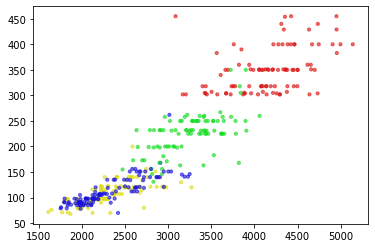

In [33]:
plt.scatter(car_data['wt'],car_data['disp'],c=car_data['Cluster_color'],alpha=0.6,s=10)
plt.show()

In [34]:
#G. Pass a new DataPoint and predict which cluster it belongs to.
k_model.predict([[17.0,7,320.0,160.0,3450,11.0,95]])

array([0])

The above datapoint is grouped in cluster 0

# PART B

CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model and compare relative results.

1. DATA UNDERSTANDING AND CLEANING

In [35]:
#A. Read ‘vehicle.csv’ and save as DataFrame.
vehi_data = pd.read_csv("vehicle.csv")
vehi_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [36]:
vehi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [37]:
#B. Check percentage of missing values and impute with correct approach.
vehi_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [38]:
(vehi_data.isna().sum() / vehi_data.shape[0]) * 100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [39]:
vehi_data = vehi_data.replace(' ',np.nan)
for i in vehi_data.columns[:17]:
    avg = vehi_data[i].mean()
    vehi_data[i] = vehi_data[i].fillna(avg)
vehi_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [40]:
vehi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

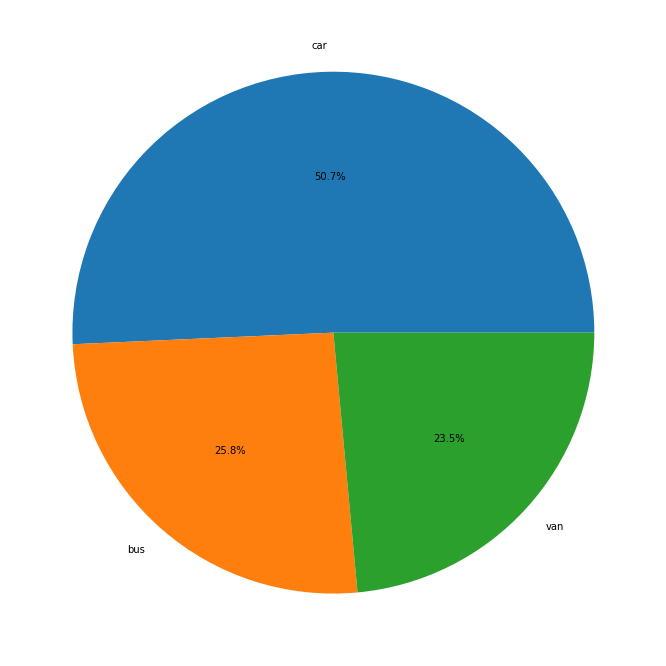

In [41]:
#C. Visualize a Pie-chart and print percentage of values for variable ‘class’
plt.figure(figsize=(15,12))
plt.pie(vehi_data['class'].value_counts(),labels=vehi_data['class'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [42]:
#D. Check for duplicate rows in the data and impute with correct approach.
vehi_data.duplicated().sum()

0

There seems to be no duplicate values in the given dataset. So we can proceed with the next steps.

2. DATA PREPARATION

In [43]:
#A. Split data into X and Y.
from sklearn.model_selection import train_test_split
X = vehi_data.drop(columns = ['class'])
Y = vehi_data['class']
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [44]:
Y.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

In [45]:
#B. Standardize the Data.
minmax_columns = list(vehi_data.columns[:18])
for column in minmax_columns:
    min_col = vehi_data[column].min()
    max_col = vehi_data[column].max()
    vehi_data[column] = (vehi_data[column] - min_col) / (max_col - min_col)
vehi_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,0.242105,0.233813,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333,van
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,0.210526,0.175060,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000,van
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,0.489474,0.540767,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000,car
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,0.157895,0.149880,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667,van
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,0.584211,0.169065,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667,bus


In [46]:
vehi_data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
vehi_data['class'] = vehi_data['class'].astype('category')
label_encode = LabelEncoder()
vehi_data['class'] = label_encode.fit_transform(vehi_data['class'])
vehi_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,0.242105,0.233813,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333,2
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,0.210526,0.175060,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000,2
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,0.489474,0.540767,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000,1
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,0.157895,0.149880,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667,2
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,0.584211,0.169065,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667,0


In [48]:
#vehi_data['class'].value_counts()
X_n = vehi_data.drop(columns = ['class'])
Y_n = vehi_data['class']
X_n.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,0.242105,0.233813,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,0.210526,0.175060,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,0.489474,0.540767,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,0.157895,0.149880,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,0.584211,0.169065,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667


In [49]:
Y_n.head()

0    2
1    2
2    1
3    2
4    0
Name: class, dtype: int32

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X_n,Y_n,test_size=0.2,random_state=1)
X_train.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
135,0.347826,0.538462,0.597222,0.951965,0.945055,0.867925,0.300654,0.485714,0.250000,0.642857,0.521053,0.215827,0.421384,0.500000,0.000000,0.341463,0.266667,0.433333
223,0.173913,0.423077,0.444444,0.152838,0.142857,0.075472,0.267974,0.514286,0.166667,0.400000,0.263158,0.195444,0.433962,0.289474,0.045455,0.365854,0.200000,0.166667
388,0.456522,0.538462,0.625000,1.000000,1.000000,0.886792,0.281046,0.485714,0.166667,0.528571,1.000000,0.203837,0.490566,1.000000,0.545455,0.219512,0.400000,0.500000
134,0.630435,0.807692,0.833333,0.257642,0.065934,0.150943,0.660131,0.142857,0.583333,0.785714,0.468421,0.581535,0.578616,0.223684,0.545455,0.658537,0.366667,0.466667
619,0.521739,0.846154,0.777778,0.288210,0.076923,0.150943,0.679739,0.142857,0.583333,0.785714,0.468421,0.600719,0.685535,0.210526,0.000000,0.097561,0.266667,0.400000


3. MODEL BUILDING

In [51]:
#A. Train a base Classification model using SVM.
from sklearn import svm
SVM = svm.SVC(gamma=0.025,C=3,probability=True)
SVM.fit(X_train,Y_train)
base_predict = SVM.predict(X_test)
print("Training accuracy = ",SVM.score(X_train,Y_train))
print("Testing accuracy = ",SVM.score(X_test,Y_test))

Training accuracy =  0.7825443786982249
Testing accuracy =  0.7823529411764706


In [52]:
#B. Print Classification metrics for train data.
from sklearn.metrics import classification_report
print(classification_report(Y_test,base_predict))

              precision    recall  f1-score   support

           0       0.61      0.51      0.56        37
           1       0.81      0.87      0.84        90
           2       0.84      0.84      0.84        43

    accuracy                           0.78       170
   macro avg       0.75      0.74      0.74       170
weighted avg       0.78      0.78      0.78       170



In [53]:
#C. Apply PCA on the data with 10 components.
from sklearn.decomposition import PCA
cov_matrix = np.cov(X_n.T)
print("The covariance matrix of the data is: \n ",cov_matrix)

The covariance matrix of the data is: 
  [[ 3.20446910e-02  2.89469014e-02  3.09138013e-02  1.80115057e-02
   1.42189641e-03  2.30391884e-03  3.15459386e-02 -3.15085163e-02
   3.14156429e-02  2.50989299e-02  2.25334416e-02  3.09022675e-02
   2.14414081e-02 -4.39904366e-03  9.40299667e-03  6.13695239e-03
   1.09589158e-02  1.62258893e-02]
 [ 2.89469014e-02  5.56586668e-02  4.09020626e-02  2.13677423e-02
   3.13390127e-03  5.14513272e-03  4.34162038e-02 -4.32768361e-02
   4.29978065e-02  4.70602283e-02  3.10229689e-02  4.18559356e-02
   4.47607433e-02  1.22043864e-03  7.59218557e-03 -6.09027100e-04
  -5.11118038e-03  2.65105499e-03]
 [ 3.09138013e-02  4.09020626e-02  4.77962981e-02  2.44602492e-02
   2.99947984e-03  5.02113880e-03  4.28984443e-02 -4.44726036e-02
   4.21161509e-02  3.51198025e-02  3.10992798e-02  4.10445800e-02
   3.15919430e-02 -4.85219459e-03  5.54551805e-03  1.26460517e-02
   6.52610489e-03  1.80028577e-02]
 [ 1.80115057e-02  2.13677423e-02  2.44602492e-02  2.12739159e

In [54]:
eigval, eigvect = np.linalg.eig(cov_matrix)
print("Eigen vectors of the data:\n",eigvect)
print("Eigen values of the data:\n",eigval)

Eigen vectors of the data:
 [[ 2.39160066e-01 -1.28893993e-01  7.33804097e-02  5.34330253e-02
  -2.52284145e-01 -7.54587327e-02 -5.66406957e-01  5.38617411e-01
   4.27282240e-01  6.08604900e-02  7.45910963e-03 -2.18283549e-01
   4.88286229e-03 -5.34174758e-02 -1.25957200e-02 -2.50691000e-02
   5.86648674e-03  2.43055283e-03]
 [ 3.42910657e-01  1.40112786e-01  1.74593681e-01 -1.12942408e-01
   3.87385604e-01 -1.78792596e-01  9.54382576e-02  1.42636393e-01
  -3.32116031e-02  2.33649717e-01 -1.32668681e-01  4.72036409e-02
  -3.05970842e-03 -4.65521812e-02  4.55733021e-02 -1.31619726e-01
  -6.58807886e-01  2.77352498e-01]
 [ 3.25181085e-01 -9.74246329e-02 -6.90162564e-02  4.26511912e-02
   2.89435292e-02 -3.42060136e-02 -2.40580712e-01 -6.18041461e-01
   3.95341434e-01 -1.07439707e-01 -3.95293848e-01  2.32466638e-01
  -3.99739573e-03  1.10291555e-02 -5.00103451e-02 -1.66015639e-01
   1.03182591e-01  1.31676231e-01]
 [ 1.81185635e-01 -1.47424405e-01 -3.20634114e-02 -1.01451445e-01
   4.7649

In [55]:
pca10 = PCA(n_components=10)
X_DR = pca10.fit(X_n)
X_DR.components_

array([[ 2.39160066e-01,  3.42910657e-01,  3.25181085e-01,
         1.81185635e-01,  2.49531695e-02,  3.40546449e-02,
         3.38084810e-01, -3.42737679e-01,  3.33591324e-01,
         2.90681327e-01,  2.46817516e-01,  3.27057114e-01,
         2.76912353e-01, -1.07125340e-02,  4.71675061e-02,
         6.12967425e-02,  2.06394171e-02,  7.88899952e-02],
       [ 1.28893993e-01, -1.40112786e-01,  9.74246329e-02,
         1.47424405e-01,  5.62568981e-02,  8.57779234e-03,
        -3.33673655e-02, -3.14869645e-02, -4.58175242e-02,
        -1.08844148e-01, -3.07061692e-02, -3.79194469e-02,
        -2.07381349e-01, -2.28781694e-01,  7.20314930e-02,
         1.73549873e-01,  5.59571985e-01,  6.83433953e-01],
       [ 7.33804097e-02,  1.74593681e-01, -6.90162564e-02,
        -3.20634114e-02,  3.84921139e-03,  4.31781253e-03,
        -9.53458507e-02,  8.82866337e-02, -9.05196538e-02,
         1.51381630e-01, -9.16691369e-02, -8.74302959e-02,
         1.66146780e-01, -3.43160730e-02,  6.99332585e

Cumulative Variance Explained:
 [ 57.74041389  75.09996906  83.31788902  89.81015454  92.88234473
  95.52020773  96.71205488  97.85236747  98.42567791  98.87492246
  99.24270043  99.48497465  99.64126816  99.78351648  99.87671047
  99.93699836  99.9792427  100.        ]


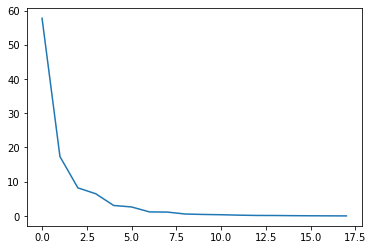

In [56]:
#D. Visualize Cumulative Variance Explained with Number of Components
tot = sum(eigval)
var = [(i/tot)*100 for i in sorted(eigval,reverse=True)]
cum_var = np.cumsum(var)
print("Cumulative Variance Explained:\n",cum_var)
plt.plot(var)

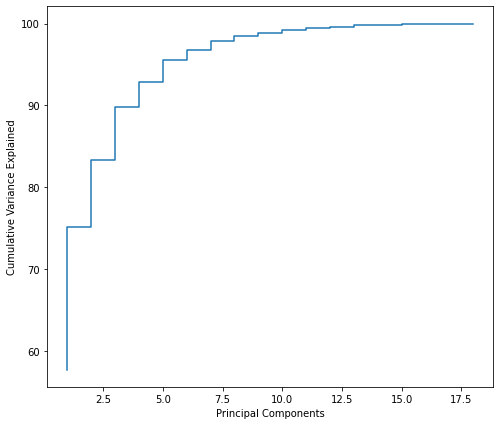

In [57]:
plt.figure(figsize=(8,7))
plt.step(range(1,eigval.size + 1),cum_var)
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

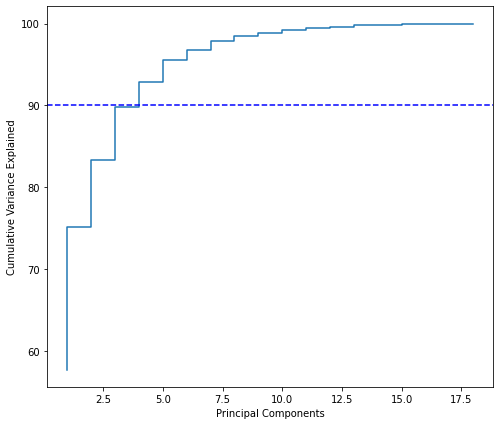

In [58]:
#E. Draw a horizontal line on the above plot to highlight the threshold of 90%.
plt.figure(figsize=(8,7))
plt.step(range(1,eigval.size + 1),cum_var)
plt.axhline(y=90,color='b',linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

We can see in the above step graph that the variance explained is above 90% from 5 principal components. So we can select the number of principal components as 5.

In [59]:
#F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.
pca5 = PCA(n_components=5)
X_reduce_train = pca5.fit_transform(X_train)
X_reduce_test = pca5.fit_transform(X_test)
print(X_reduce_train.shape)
print(X_reduce_test.shape)

(676, 5)
(170, 5)


In [60]:
#G. Train SVM model on components selected from above step.
SVM = svm.SVC(gamma=0.025,C=3,probability=True)
SVM.fit(X_reduce_train,Y_train)
base_predict_1 = SVM.predict(X_reduce_test)
print("Training accuracy = ",SVM.score(X_reduce_train,Y_train))
print("Testing accuracy = ",SVM.score(X_reduce_test,Y_test))

Training accuracy =  0.6479289940828402
Testing accuracy =  0.5647058823529412


In [61]:
#H. Print Classification metrics for train data of above model and share insights. [
print(classification_report(Y_test,base_predict_1))

              precision    recall  f1-score   support

           0       0.39      0.38      0.38        37
           1       0.65      0.70      0.67        90
           2       0.51      0.44      0.48        43

    accuracy                           0.56       170
   macro avg       0.52      0.51      0.51       170
weighted avg       0.56      0.56      0.56       170



There seems to be some difference between the accuracy of the training and the testing model of nearly 9%. The previous base model seems to be performed better than the above model. So we need to find the best model along with the best parameters.  

4. PERFORMANCE IMPROVEMENT

In [62]:
#A. Train another SVM on the components out of PCA. Tune the parameters to improve performance.
from sklearn.model_selection import GridSearchCV
params = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}
grid = GridSearchCV(svm.SVC(probability=True),params,refit=True,verbose=1)
g_svm_pca = grid.fit(X_reduce_train,Y_train)
g_pred = g_svm_pca.predict(X_reduce_test)
g_svm_pca.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8254248366013073

In [63]:
#B. Share best Parameters observed from above step. 
g_svm_pca.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [64]:
#C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.
print(classification_report(Y_test,g_pred))

              precision    recall  f1-score   support

           0       0.53      0.43      0.48        37
           1       0.66      0.67      0.66        90
           2       0.35      0.40      0.37        43

    accuracy                           0.55       170
   macro avg       0.51      0.50      0.50       170
weighted avg       0.55      0.55      0.55       170



The SVM model after applying gridsearch performed better than the model with 5 principal components without gridsearch. 

5. DATA UNDERSTANDING AND CLEANING

A. Explain pre-requisite/assumptions of PCA. 


   i) The flaw dataset that is available should be standardized or normalized         before performing the principal component analysis to avoid larger             standard deviation of the dataset
   
   ii) Covariance matrix, eigen values of the normalized data should be                computed and eigen vectors are to be found corresponding to the                respective eigen values
   
   iii) Components of higher variance are to be used and components of lower           variance are considered to be noise
   
   iv) The given dataset contains 18 features or attributes which leads to            overfitting and higher standard deviation between each values of                attributes 

B. Explain advantages and limitations of PCA.

   ADVANTAGES:
   
   i) The correlated attributes are removed when applying principal component         analysis
   
   ii) PCA helps in reducing overfiting of a ML algorithm and increasing that          particular performance of ML algorithm
   
   iii) It improves statistic and data visualization 
   
   DISADVANTAGES:
   
   i) Standardizing or normalizing the dataset is required before applying PCA
   
   ii) Reduction in dataset may lead to some crucial information losses
   
   iii) Independent attributes may become less interpretable